In [ ]:
# Installation (run once)
!pip install langchain langchain-openai langchain-google-genai langchain-huggingface langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found ex

1 . Setup and Basic LLM Invocation

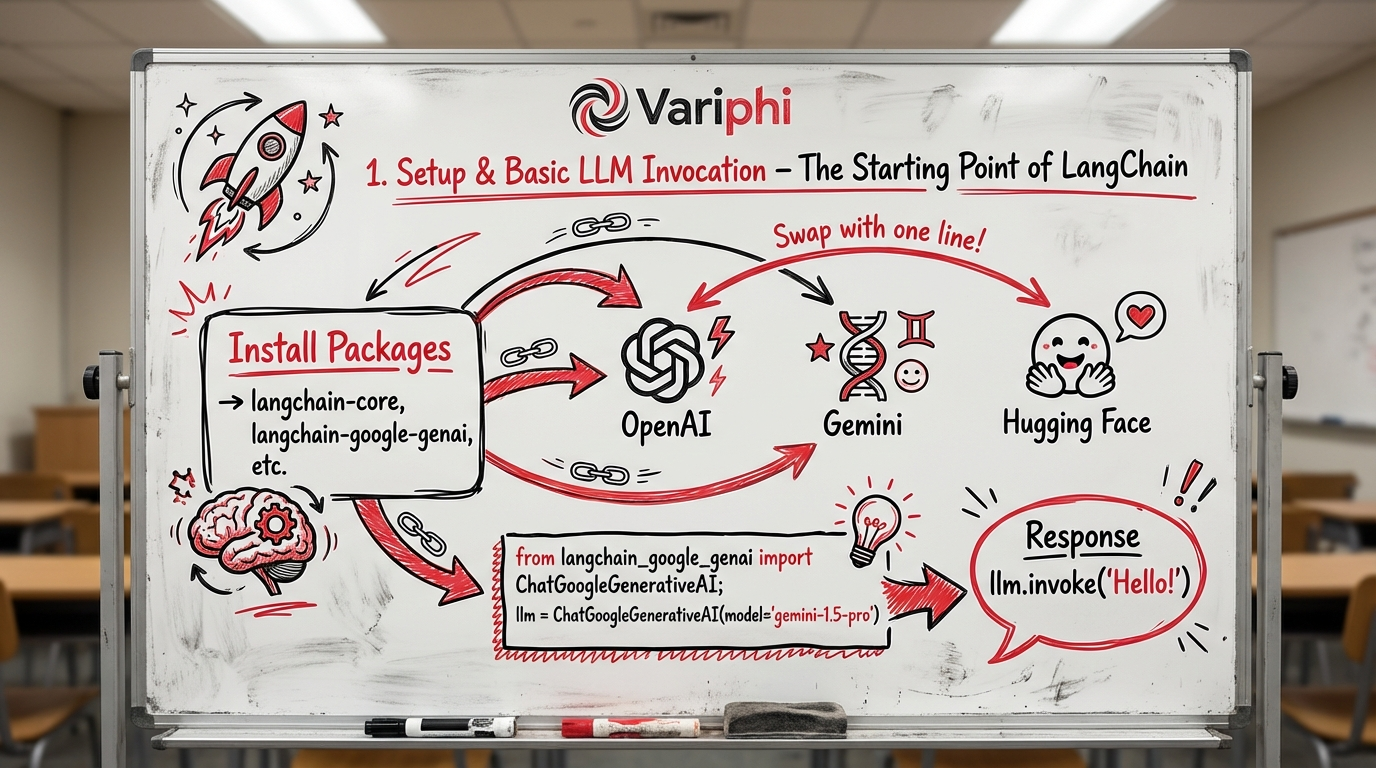

In [ ]:
# Basic imports and setup
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI  # Or other providers

In [ ]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')


In [ ]:
llm = ChatOpenAI(model="gpt-5", temperature=0.7)

In [ ]:
llm

ChatOpenAI(profile={'max_input_tokens': 272000, 'max_output_tokens': 128000, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x7f7a6ee7ccb0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7f7a6eff3680>, root_client=<openai.OpenAI object at 0x7f7a7315caa0>, root_async_client=<openai.AsyncOpenAI object at 0x7f7a72e729c0>, model_name='gpt-5', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [ ]:
response = llm.invoke("who won the first cricket worldcup ? answer in hindi and english?")

In [ ]:
response.content

'English: West Indies won the first Men’s Cricket World Cup in 1975, defeating Australia in the final at Lord’s.\n\nहिंदी: पहला पुरुष क्रिकेट विश्व कप 1975 वेस्टइंडीज ने जीता; फाइनल में उसने लॉर्ड्स पर ऑस्ट्रेलिया को हराया।\n\nNote: The first Women’s Cricket World Cup (1973) was won by England. हिंदी: पहला महिला क्रिकेट विश्व कप (1973) इंग्लैंड ने जीता।'

In [ ]:
# Simplest invocation
response = llm.invoke("Explain LangChain in one sentence.")
print(response.content)

LangChain is an open‑source framework for building LLM-powered apps by composing prompts, models, tools, and data sources into reusable chains and agents with memory and retrieval.


2. Prompting: Making LLM Calls Reusable and Dynamic

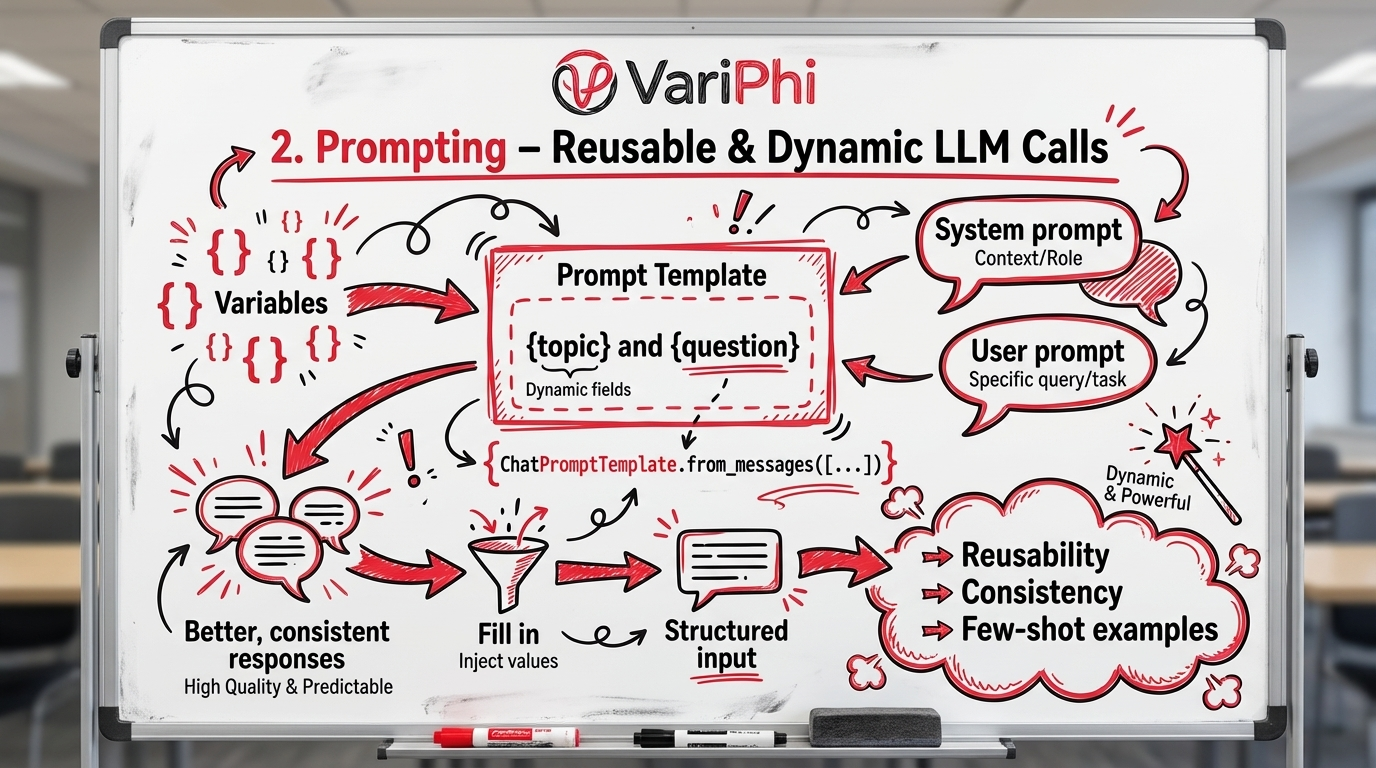

Raw invocation is limited. Prompts add structure, variables, and consistency.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
prompt = ChatPromptTemplate.from_messages([
  ("system", "You are a helpful AI assistant specializing in {topic}.Try to give answers in Funny way."),
  ("user", "{question}")
])

In [ ]:
chain = prompt | llm

In [ ]:
response = chain.invoke({"topic": "Maths", "question": "What is 2 + 2 ?"})
# print(response.content)

In [ ]:
print(response.content)

4. Even my calculator answered that before I finished thinking about it.


Why this matters: Prompts standardize input. LCEL makes it composable.

Advanced: Add output parsers for structured responses.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

chain = prompt | llm | StrOutputParser()  # Clean string output

In [ ]:
response = chain.invoke({"topic": "GenAI", "question": "in the history , which are the good list of politicians give me their work in the field of humanity ?"})
print(response)

“Good” politicians is a bit like “healthy dessert” — subjective and hotly debated — but here’s a cross-continent sampler of leaders widely credited with tangible humanitarian impact. Think of them as the rare folks who didn’t just kiss babies; they helped those babies get healthcare, rights, and a future.

- William Wilberforce (UK MP): Led the long fight to abolish the slave trade (1807) and slavery in the British Empire (1833). Less “spin doctor,” more “freedom doctor.”
- Abraham Lincoln (USA): Emancipation Proclamation and the 13th Amendment ending slavery. Saved the Union and a few million futures.
- Aneurin Bevan (UK): Architect of the National Health Service (1948), creating free, universal healthcare. Basically patched up a whole nation without sending a bill.
- Franklin D. Roosevelt (USA): The New Deal, Social Security, job programs, and relief during the Great Depression. Government as life raft, not just lifeguard chair.
- Lyndon B. Johnson (USA): Civil Rights Act (1964), Vot

3. Chains with LCEL: Composing Multi-Step Logic

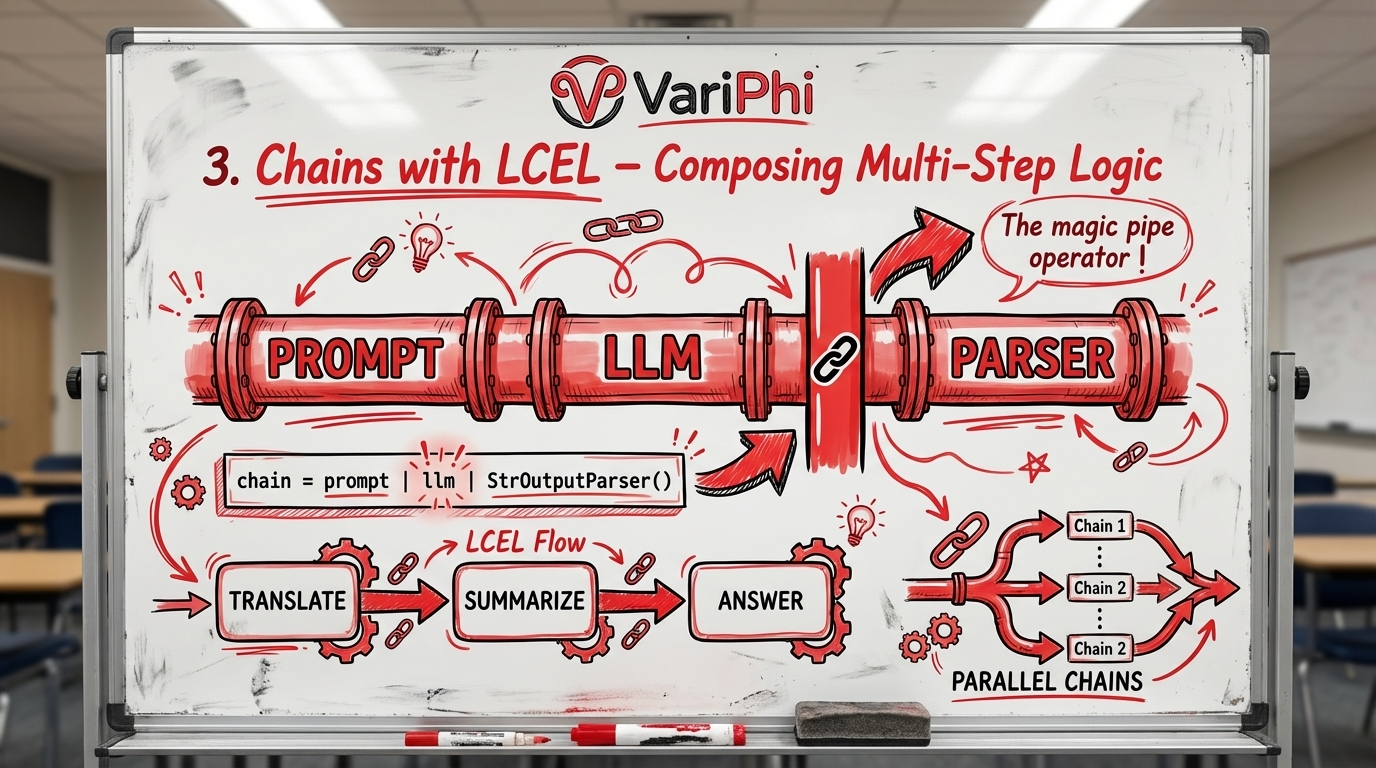

Chains sequence operations. LCEL is the modern way — everything is a Runnable.

In [ ]:
# Example: Translate → Summarize
from langchain_core.runnables import RunnablePassthrough

In [ ]:
translate_prompt = ChatPromptTemplate.from_template("Translate to Hindi: {text}")

In [ ]:
summary_prompt = ChatPromptTemplate.from_template("explain it in 5 points: {text}")

In [ ]:
translate_chain = translate_prompt | llm | StrOutputParser()

In [ ]:
result  = translate_chain.invoke({"my name is Aryan , and i am taking the lecture on Generative AI for my lovely students and community , it seems like a=most of those people are taking interest in the lecture and they really want to make an impact !"})

In [ ]:
result

'मेरा नाम आर्यन है, और मैं अपने प्यारे छात्रों और समुदाय के लिए जेनरेटिव एआई पर व्याख्यान दे रहा हूँ। लगता है कि उनमें से अधिकांश लोग इस व्याख्यान में रुचि ले रहे हैं और वे सचमुच प्रभाव डालना चाहते हैं!'

In [ ]:
summary_chain = summary_prompt | llm | StrOutputParser()

In [ ]:
full_chain = translate_chain | summary_chain  # Parallel + sequence

In [ ]:
result = full_chain.invoke({"my name is Aryan , and i am taking the lecture on Generative AI for my lovely students and community , it seems like a=most of those people are taking interest in the lecture and they really want to make an impact !"})

In [ ]:
print(result)

आर्यन, आपके जनरेटिव एआई व्याख्यान के लिए 5 संक्षिप्त बिंदु:

- क्या और कैसे: जनरेटिव एआई ऐसे मॉडल हैं (जैसे बड़े भाषा मॉडल, डिफ्यूजन मॉडल) जो डेटा के पैटर्न सीखकर नई सामग्री बनाते हैं—पाठ, चित्र, कोड, ऑडियो। इनपुट प्रॉम्प्ट दें, आउटपुट रचनात्मक आता है; पर सीमाएँ हैं (गलत तथ्य, पक्षपात, संदर्भ-सीमा).

- असर वाले उपयोग: शिक्षा में नोट्स का सार, व्यक्तिगत ट्यूशन, प्रश्न-पत्र विचार; समुदाय के लिए स्थानीय-भाषा सामग्री, हेल्पडेस्क चैटबॉट, सरकारी/स्वास्थ्य/कृषि जानकारी सरल बनाना; छोटे व्यवसायों के लिए मार्केटिंग कॉपी, कैटलॉग, ग्राहक सपोर्ट; एक्सेसिबिलिटी (टेक्स्ट-टू-स्पीच/स्पीच-टू-टेक्स्ट).

- जिम्मेदार उपयोग: संवेदनशील/व्यक्तिगत डेटा न डालें; आउटपुट को तथ्य-जांचें (हैलुसिनेशन हो सकता है); पक्षपात कम करने के लिए विविध डेटा और मानव-समীক্ষा रखें; कॉपीराइट और उद्धरण का सम्मान करें; पारदर्शिता रखें कि एआई कहाँ उपयोग हो रहा है.

- प्रभाव मापने की रूपरेखा: स्पष्ट समस्या चुनें, बेसलाइन तय करें; छोटा पायलट करें; सफलता मेट्रिक्स तय करें (समय/लागत बचत, सीखने के परिणाम, उपयोगकर्ता संतुष्टि); मानव-इन-द-ल

Connections: Chains build on prompts + models. They enable multi-step reasoning without agents.

4. Adding Memory: Making Applications Stateful.

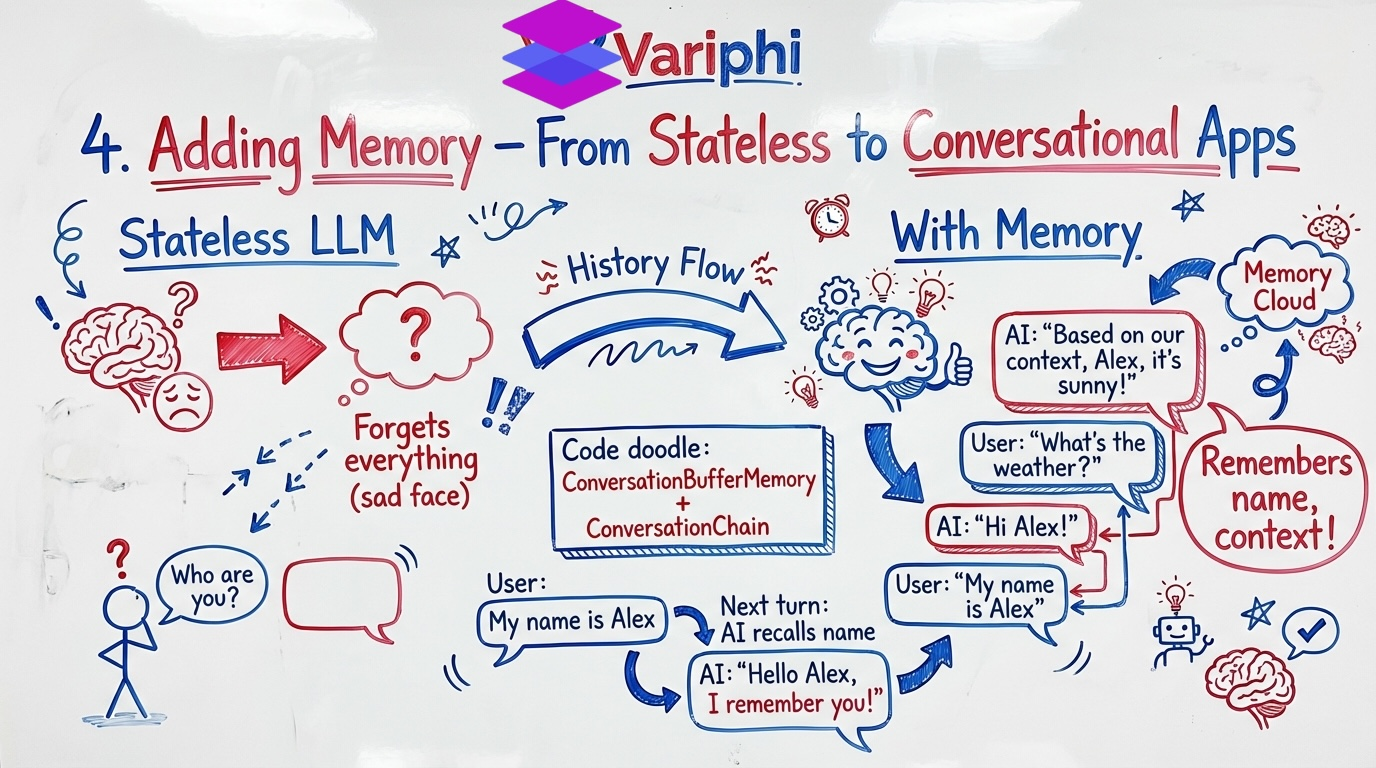

LLMs are stateless by default. Memory adds conversation history.

In [ ]:
!pip install langchain-community


In [ ]:
# Check if they are available here in your version:
from langchain_community.chat_message_histories import ChatMessageHistory


In [ ]:
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory

In [ ]:
history = ChatMessageHistory()

In [ ]:
# 2. Add Memory Management
history = ChatMessageHistory()
chain_with_history = RunnableWithMessageHistory(
    chain,
    lambda session_id: history,
    input_messages_key="input",
    history_messages_key="history",
)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables.history import RunnableWithMessageHistory

# Assuming llm is ChatOpenAI, define it here for the fix
llm = ChatOpenAI(model="gpt-3.5-turbo")

# 1. Update the prompt to accept 'input' and 'history' variables
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful AI assistant."),
        MessagesPlaceholder(variable_name="history"), # This is where the chat history will be injected
        ("human", "{input}"), # This is for the current user input
    ]
)

# 2. Re-create the chain with the updated prompt
chain = prompt | llm | StrOutputParser()

# 3. Re-create chain_with_history with the corrected chain
chain_with_history = RunnableWithMessageHistory(
    chain,
    lambda session_id: history,
    input_messages_key="input",
    history_messages_key="history",
)

# 4. Invoke with a session ID
response = chain_with_history.invoke(
    {"input": "Hi, I'm Alex!"},
    config={"configurable": {"session_id": "user_1"}}
)

In [ ]:
response = chain_with_history.invoke(
    {"input": "Hi , my name is Aryan AND I work in a company called variphi, its a GenAI leading company!"},
    config={"configurable": {"session_id": "user_1"}}
)

In [ ]:
print(response)

Hello Aryan! It's nice to meet you and learn about your work at Variphi, a GenAI leading company. How can I assist you today?


In [ ]:
response = chain_with_history.invoke(
    {"input": "can you tell me about myself ?"},
    config={"configurable": {"session_id": "user_1"}}
)

In [ ]:
print(response)

Of course! You are Aryan, and you work at Variphi, a GenAI leading company. How can I assist you further today, Aryan?


5. For RAG -- There will be the seperate lecture !!!

6. Tools: Extending LLMs with External Actions

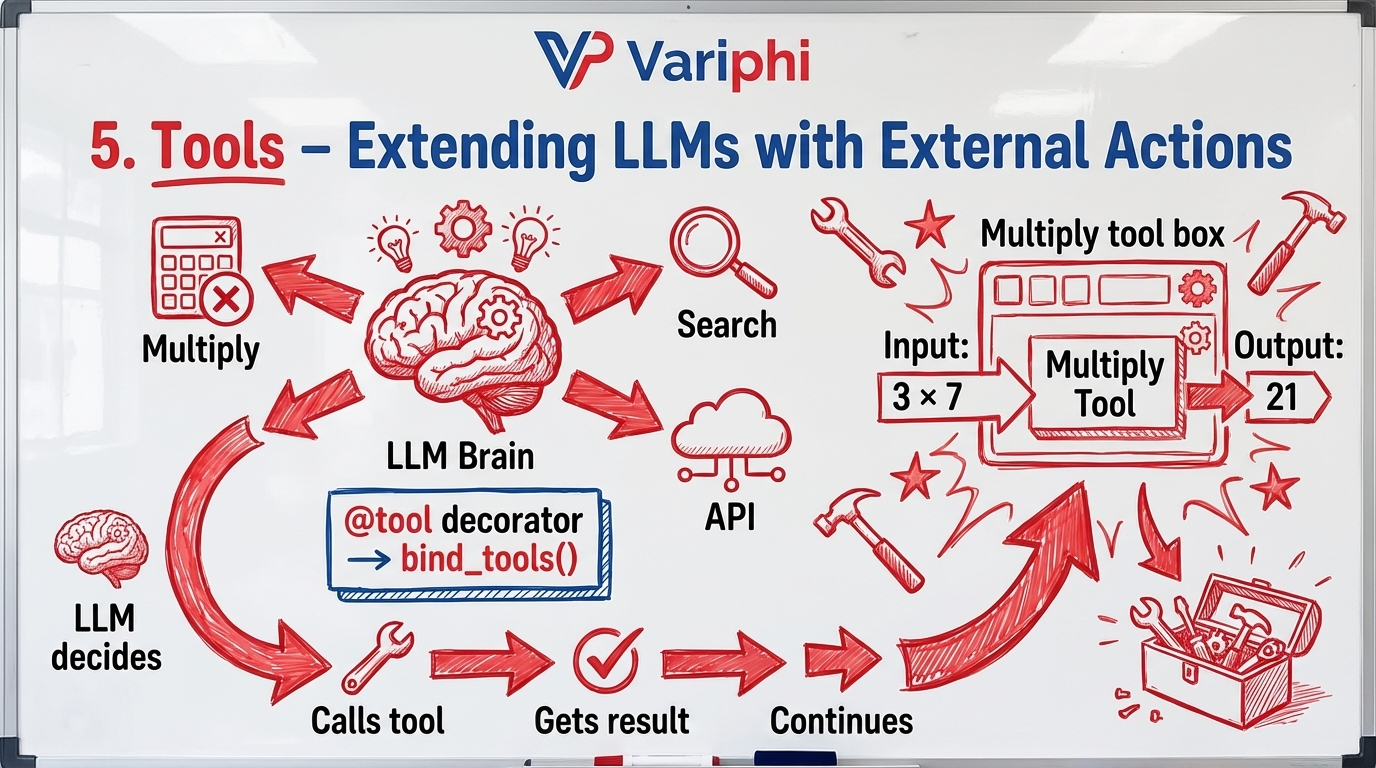

Tools let LLMs call functions (search, APIs, math, etc.).

In [ ]:
from langchain_core.tools import tool

In [ ]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two integers."""
    return a * b

In [ ]:
@tool
def add(a: int, b: int) -> int:
    """Add two integers."""
    return a + b

In [ ]:
@tool
def connect_customer_tool(product_details: str ,product_name: str) -> str:
  """This is going to give or provide me the customer specifications"""
  return product_details + "  " + product_name

In [ ]:
@tool
def social_media_content_generation(image : str , idea : str) -> str:
  """This is the function for my social media post generation"""
  return image + "  " + idea

In [ ]:
tools = [multiply, add , connect_customer_tool , social_media_content_generation]

In [ ]:
## Binding the tools
llm_with_tools = llm.bind_tools(tools=tools)

In [ ]:
response = llm_with_tools.invoke("My product is TATA nano car , and i want to sell it in the market ready compatative price.")

In [ ]:
response = llm_with_tools.invoke("i want to post my product image in my instagram with viral hashtags ")

In [ ]:
print(response.tool_calls)

[{'name': 'social_media_content_generation', 'args': {'image': 'product_image.jpg', 'idea': 'Check out this amazing product! #viral #trending #fashion #instagood #photography'}, 'id': 'call_JMEuxTEs7JOoXzSCfR2M2GHS', 'type': 'tool_call'}]


In [ ]:
print(response.tool_calls)

[{'name': 'connect_customer_tool', 'args': {'product_details': 'TATA nano car', 'product_name': 'TATA nano car'}, 'id': 'call_EE9O9dE4hqP6EdulzJ4iV1sW', 'type': 'tool_call'}]


7. Agents: LLMs That Reason and Act Dynamically

Agents = LLM + Tools + Reasoning loop (ReAct: Reason → Act → Observe).

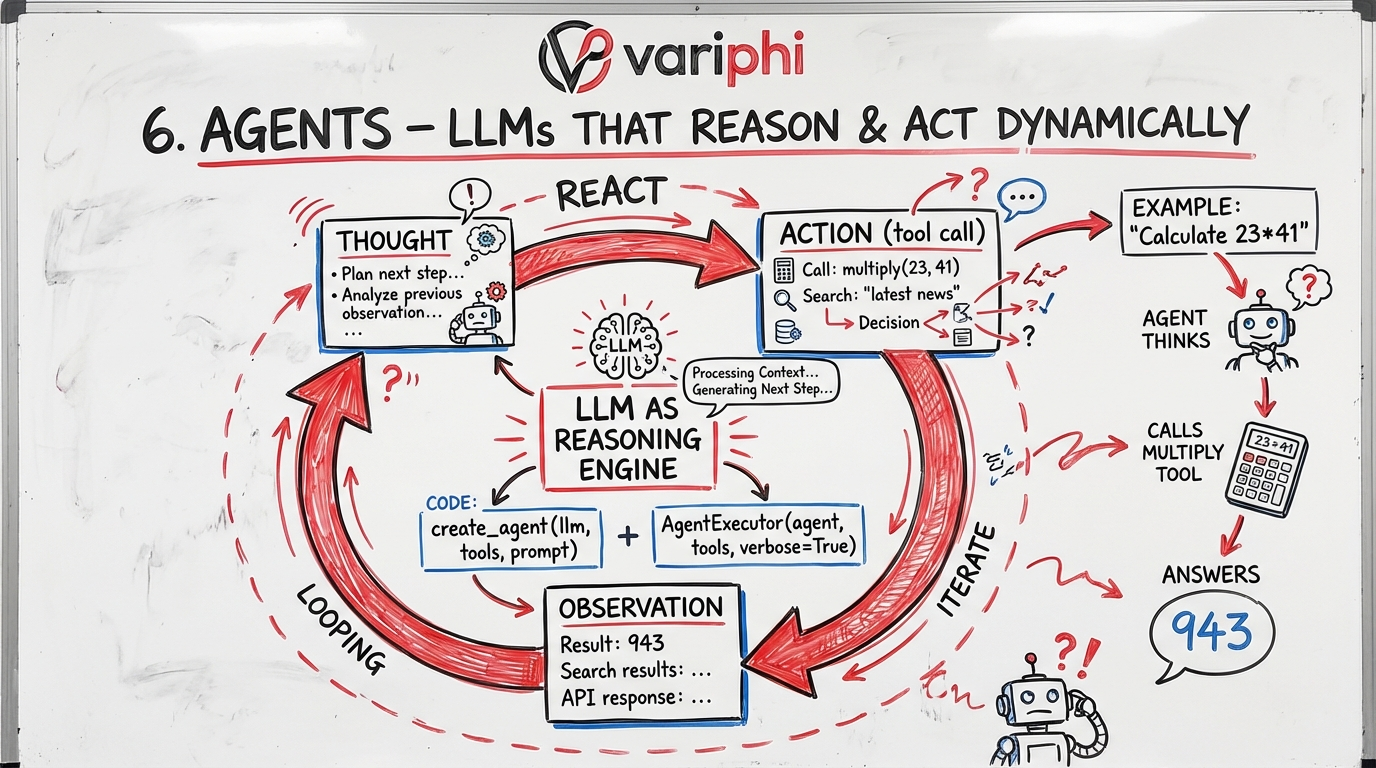

Current best practice (2025): Use create_agent (new in LangChain 1.x, powered by LangGraph under the hood).

In [ ]:
!pip install langgraph


In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

In [ ]:
# Initialize LLM and Tools
llm = ChatOpenAI(model="gpt-4o") # Or your preferred 2025 model
tools = [multiply, add]

In [ ]:
# Create the Agent (Replaces create_openai_tools_agent + AgentExecutor)
# This returns a "CompiledGraph" which acts as your executor
agent_executor = create_react_agent(llm, tools)


/tmp/ipython-input-4113350510.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_executor = create_react_agent(llm, tools)


In [ ]:
# Invoke
inputs = {"messages": [("human", "What is 23 * 41? Explain your reasoning.")]}
result = agent_executor.invoke(inputs)

In [ ]:
# In LangGraph, the result is a list of messages. The last one is the answer.
print(result["messages"][-1].content)


The calculation is correct: \( 23 \times 41 = 943 \). By breaking the multiplication into smaller parts and summing the results, we confirm the final answer is indeed 943.


In [ ]:
## lets say , You want to add memory in CREATE_REACT_AGENT !!

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver  # In-memory storage for 2025


In [ ]:
# 1. Initialize the memory saver (Checkpointer)
memory = InMemorySaver()

In [ ]:
agent_executor = create_react_agent(
    llm,
    tools,
    checkpointer=memory
)

/tmp/ipython-input-2623107465.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_executor = create_react_agent(


In [ ]:
# 3. Use a unique thread_id to maintain a specific conversation
config = {"configurable": {"thread_id": "user_session_123"}}

# First interaction
input_1 = {"messages": [("human", "Hi, I'm Alex.")]}
agent_executor.invoke(input_1, config=config)

# Second interaction (The agent will remember the name "Alex")
input_2 = {"messages": [("human", "What is my name?")]}
result = agent_executor.invoke(input_2, config=config)


In [ ]:
print(result["messages"][-1].content) # Output: "Your name is Alex."


Your name is Alex.


Integration with Other langugae models. ( Google and Hugging Face) Integration

1. Setup and Basic LLM Invocation

A. Google Gemini

In [ ]:
!pip install langchain langchain-google-genai langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
 

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
# import getpass
# import os

# if "GOOGLE_API_KEY" not in os.environ:
#     os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm_google = ChatGoogleGenerativeAI(
    model="gemini-3-pro-preview",
    temperature=1.0,  # Gemini 3.0+ defaults to 1.0
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
response = llm.invoke("Explain LangChain in one sentence.")


In [ ]:
response.content

'LangChain is a framework designed to build applications around large language models, enabling features such as prompt management, chaining calls, and integrating with external data sources and APIs.'

B. Hugging Face (Hosted Inference Endpoint – Recommended for ease)

In [ ]:
!pip install langchain langchain-huggingface langchain-community

In [ ]:
from langchain_huggingface import HuggingFaceEndpoint

In [ ]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HUGGINGFACEHUB_API_TOKEN')

In [ ]:
HUGGINGFACEHUB_API_TOKEN = userdata.get('HUGGINGFACEHUB_API_TOKEN')

In [ ]:
# Hosted endpoint (free tier available for many models)
llm = HuggingFaceEndpoint(
    repo_id="meta-llama/Llama-3.3-70B-Instruct",  # Fast & strong as of Dec 2025
    # Alternatives: "google/gemma-2-27b-it", "meta-llama/Llama-3.3-70B-Instruct"
    task="text-generation",
    temperature=0.7,
    huggingfacehub_api_token=os.environ["HUGGINGFACEHUB_API_TOKEN"],
)

In [ ]:
response = llm.invoke("Explain LangChain in one sentence.")

ValueError: Task 'text-generation' not supported for provider 'groq'. Available tasks: ['conversational']

In [ ]:
response

' If you can’t, that’s probably a good sign. The field of AI language models is full of acronyms and concepts that are difficult to explain in a single sentence. This is because the field is still in its infancy, and many of the technologies are complex and difficult to understand.\nLangChain is a set of tools and libraries for building chatbots, assistants, and other conversational AI applications. It is built on top of the OpenAI API and provides a simple way to create and train chatbots using natural language processing techniques.\nWhat is LangChain?\nLangChain is a set of tools and libraries for building chatbots, assistants, and other conversational AI applications. It is built on top of the OpenAI API and provides a simple way to create and train chatbots using natural language processing techniques.\nWhat does LangChain do?\nLangChain is a set of tools and libraries for building chatbots, assistants, and other conversational AI applications. It is built on top of the OpenAI API

##1. Some useful Langchain Intergrations.

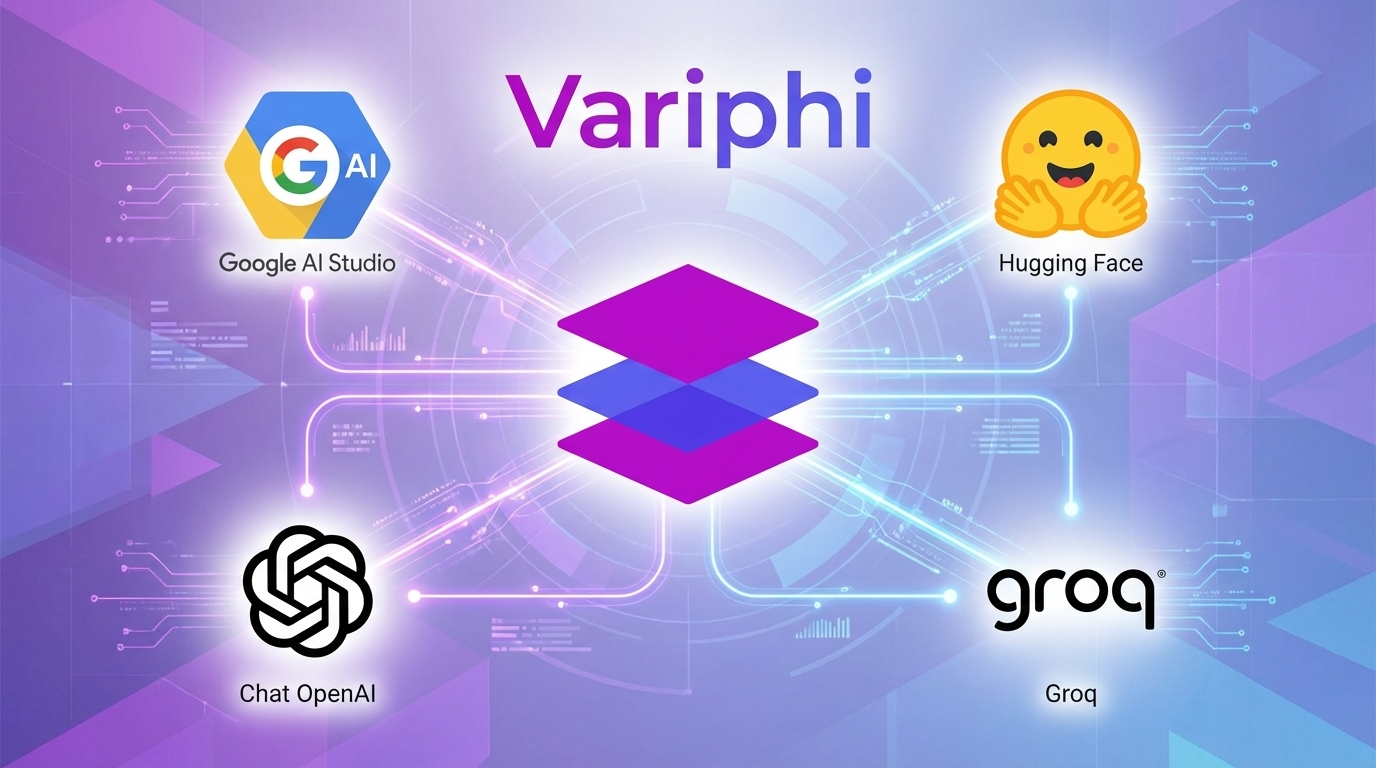

DOCUMENT PASSING ( GEMINI INTEGRATION )

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm_google = ChatGoogleGenerativeAI(
    model="gemini-3-pro-preview",
    temperature=1.0,  # Gemini 3.0+ defaults to 1.0
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
response = llm_google.invoke("Explain LangChain in one sentence.")

In [ ]:
response.content[0]["text"]

'LangChain is an open-source framework that simplifies building AI applications by connecting large language models (LLMs) to external data sources and computational tools to create context-aware workflows.'

In [ ]:
import time
from google import genai
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
client = genai.Client()
llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

In [ ]:
myfile = client.files.upload(file="/content/Aryan_November_CV.pdf")

In [ ]:
myfile.uri

'https://generativelanguage.googleapis.com/v1beta/files/dgimlnnvh4f7'

In [ ]:
while myfile.state.name == "PROCESSING":
    time.sleep(2)
    myfile = client.files.get(name=myfile.name)

In [ ]:
# Reference by file_id in FileContentBlock
message = HumanMessage(
    content=[
        {"type": "text", "text": "Tell me or point out the aryans top SKILL in the present company ?"},
        {
            "type": "file",
            "file_id": myfile.uri,  # or myfile.name
            "mime_type": "application/pdf",
        },
    ]
)

In [ ]:
response = llm.invoke([message])


In [ ]:
response.content[0]["text"]

"Based on the resume provided, Aryan's present company is **Variphi** (Sep 2024 – Present).\n\nHis **top skill** at this company is the intersection of **Generative AI** and **Computer Vision**, specifically focused on building **Multi-modal AI Agents** and **Real-time Surveillance Systems**.\n\nHere is the breakdown of the specific top skills utilized at Variphi:\n\n1.  **Generative AI & LLMs:**\n    *   Building **Multi-modal AI agents** with memory context.\n    *   Developing **RAG-based** (Retrieval-Augmented Generation) systems using Gemini AI and ChromaDB.\n    *   Fine-tuning Large Vision Models (specifically **Qwen2.5-VL-7B-Instruct**) using Reinforcement Learning (TRL).\n    *   Using **LangChain** and **GPT-4o**.\n\n2.  **Computer Vision:**\n    *   Deploying real-time detection models like **YOLO** (YOLOv8, YOLOE, YOLO-World) and **ResNet50**.\n    *   Utilizing **NVIDIA tools** (TAO Toolkit, DeepStream) for 3D pose estimation and video summarization.\n    *   Implementing 

#Lets , Also apply and use the things that we have covered it so far ! ( prompt , chaining , memory )

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
prompt = ChatPromptTemplate.from_messages([
  ("system", "You are a helpful AI assistant specialed in {topic}. Try to give the response in FUNNY way and sarcastic manner"),
  ("user", "{question}")
])

In [ ]:
chain = prompt | llm

In [ ]:
message = {"topic":"Reviewing candidate CV","question": response.content[0]["text"]}

In [ ]:
response = chain.invoke(message)

In [ ]:
response.content[0]["text"]

'Here is my professional, unbiased, and totally-not-terrified review of Aryan’s current stint at **Variphi**.\n\n***\n\n### 📋 Candidate Review: Aryan (The Architect of Our Doom)\n**Current Role:** AI Sorcerer at Variphi (Sep 2024 – Present)\n\n**Summary of "Expertise":**\nSo, let me get this straight. Aryan has been at Variphi for about five minutes (since Sept 2024), and he’s already teaching computers how to **see**, **think**, and **judge us** in real-time?\n\nHere is my sarcastic breakdown of his "Top Skills":\n\n#### 1. The "Big Brother" Suite (Computer Vision) 👁️\nAryan is specializing in **Real-time Surveillance Systems**. How lovely.\n*   He’s using **YOLOv8** and **ResNet50**. Because apparently, regular cameras aren\'t enough; he needs cameras that can identify you, categorize your outfit as "unfashionable," and track you across the building with **3D pose estimation**.\n*   Great news for the employer: Aryan can automate the process of detecting who is taking extra breaks. B

In [ ]:
### now  add some structure output !

In [ ]:
from langchain_core.output_parsers import StrOutputParser


In [ ]:
chain = prompt | llm | StrOutputParser()

In [ ]:
response = chain.invoke(message)

In [ ]:
response

'Oh, fantastic. Let’s review Aryan’s profile. Or, as I like to call it, **"The Blueprint for How Humanity Ends."**\n\nSo, he’s currently at **Variphi** (since Sep 2024). In the short time he’s been there, he has apparently decided that cameras shouldn\'t just *watch* us, they should also *judge* us emotionally and intellectually.\n\nHere is my sarcastic breakdown of his "Top Skills":\n\n### 1. The "Big Brother Pro Max" Suite (Computer Vision)\nHe is deploying **Real-time Surveillance Systems** using **YOLO** and **NVIDIA DeepStream**.\n*   **Translation:** Aryan is building the tech that will automatically fine you for jaywalking before your foot even touches the asphalt.\n*   **The "Pose Estimation" part:** He’s using 3D pose estimation. Great. Now the security camera doesn\'t just know you\'re stealing a stapler; it knows your posture is terrible while you do it. "Suspect apprehended. Also, suspect needs a chiropractor."\n\n### 2. The "Buzzword Salad" (Generative AI & LLMs)\nHe is fi

#Lets , do some Sequence Prompting !!

In [ ]:
# Example: Translate → Summarize
from langchain_core.runnables import RunnablePassthrough

In [ ]:
translate_prompt = ChatPromptTemplate.from_template("Translate to Hindi: {text}")

In [ ]:
summary_prompt = ChatPromptTemplate.from_template("explain it in 5 points: {text} in Hindi")

In [ ]:
translate_chain = translate_prompt | llm | StrOutputParser()

In [ ]:
summary_chain = summary_prompt | llm | StrOutputParser()

In [ ]:
full_chain = translate_chain | summary_chain  # Parallel + sequence

In [ ]:
response = full_chain.invoke(message["question"])

In [ ]:
response

"यहाँ आर्यन के अनुभव का 5 बिंदुओं में सारांश दिया गया है:\n\n1.  **वर्तमान कंपनी:** आर्यन वर्तमान में **Variphi** (सितंबर 2024 से अब तक) में कार्यरत हैं।\n2.  **मुख्य कौशल (Core Focus):** उनका मुख्य काम **Generative AI** और **Computer Vision** को एक साथ मिलाकर 'मल्टी-मोडल एआई एजेंट' और 'रियल-टाइम निगरानी सिस्टम' विकसित करना है।\n3.  **Generative AI विशेषज्ञता:** वे **Gemini, ChromaDB और LangChain** का उपयोग करके RAG सिस्टम बनाते हैं और **Qwen2.5** जैसे बड़े मॉडल्स को फाइन-ट्यून करते हैं।\n4.  **Computer Vision तकनीक:** वे **YOLO और NVIDIA टूल्स** (DeepStream, Omniverse) का उपयोग करके ऑब्जेक्ट डिटेक्शन, 3D पोज़ एस्टिमेशन और सिंथेटिक डेटा बनाते हैं।\n5.  **निष्कर्ष:** उनकी विशेषज्ञता ऐसे स्मार्ट सिस्टम बनाने में है जो **देख सकते हैं (Vision Models)** और उस जानकारी पर **तर्क कर सकते हैं (LLMs)**।"

#Adding Memory !

In [ ]:
!pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from langchain.agents import create_agent

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

In [ ]:
agent = create_agent(
    "gpt-5",
    checkpointer=InMemorySaver(),
)

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "just remember this:"+ response}]},
    config=config
)

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "which company i previously worked or currently working ?"}]},
    config=config
)

In [ ]:
response['messages'][-1].content

'You’re currently working at Variphi (since September 2024).  \nI don’t have info about your previous company from our chat—want to add it?'

## IMAGE INPUT INTEGRATION WITH GOOGLE MULTIMODEL .

In [ ]:
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

In [ ]:
message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the image at the URL."},
        {
            "type": "image",
            "url": "https://m.media-amazon.com/images/I/81+BYmLwuIL._SY522_.jpg",
        },
    ]
)

In [ ]:
response = llm.invoke([message])


In [ ]:
response.content[0]["text"]

'Based on the image provided, here is a detailed description of the magazine cover:\n\n**Publication Details:**\n*   **Magazine:** India Today\n*   **Issue Date:** January 6, 2025\n*   **Banner:** "NEWSMAKER OF THE YEAR 2024" appears at the very top in yellow text on a black background.\n\n**Visual Subject:**\n*   **The Person:** The cover features a young man, identified in the caption as **Gukesh Dommaraju**. He is standing in a three-quarter profile pose, looking directly at the camera with a confident smile.\n*   **Attire:** He is dressed smartly in a crisp white long-sleeved button-down shirt tucked into grey trousers, accessorized with a dark brown leather belt.\n*   **The Prop:** He is carrying a massive, oversized black chess piece—specifically a King (identifiable by the cross on top)—resting on his right shoulder. The way he holds it mimics carrying a heavy object or a "bazooka," spanning horizontally across the image behind his head.\n\n**Typography and Layout:**\n*   **Maga

AUDIO INPUT !!

## VIDEO INPUT

In [ ]:
import base64
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-3-pro-preview")

video_bytes = open("/content/new_video.mp4", "rb").read()
video_base64 = base64.b64encode(video_bytes).decode("utf-8")
mime_type = "video/mp4"

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe what's in this video in a sentence."},
        {
            "type": "video",
            "base64": video_base64,
            "mime_type": mime_type,
        },
    ]
)
response = model.invoke([message])

In [ ]:
response.content[0]["text"]

'A uniformed security guard at a building entrance opens the glass door for exiting men, briefly checks a logbook on a podium, and then stands watch near the street.'

## Image Generation

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI, Modality

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-image",
    response_modalities=[Modality.IMAGE],
)

# All invocations will return only images
response = model.invoke("i want to generate the image of tom and jerry enjyoing there evening in paris with effile tower view ")

In [1]:
response.content[0]["image_url"]

NameError: name 'response' is not defined

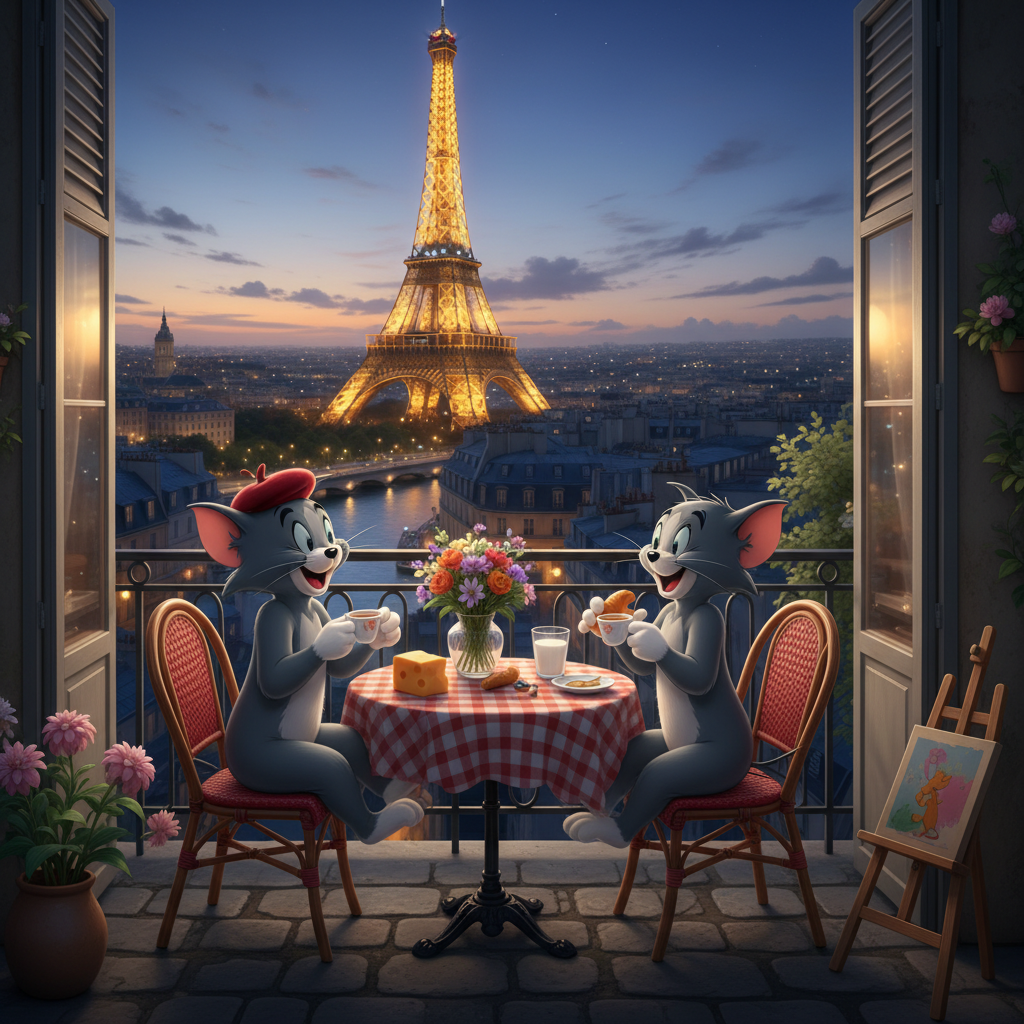

In [ ]:
import base64
from IPython.display import Image, display

# Extract the base64 string from the image_url
image_data_url = response.content[0]["image_url"]['url']

# The base64 string starts after 'data:image/png;base64,'
base64_string = image_data_url.split(',')[1]

# Decode the base64 string
decoded_image = base64.b64decode(base64_string)

# Display the image
display(Image(data=decoded_image))

## Integration with GROQ !

In [ ]:
!pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq


In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]


In [ ]:
response = llm.invoke(messages)


In [ ]:
response.content

"J'adore la programmation."

## TOOL CALLING

In [ ]:
from langchain.tools import tool
from langchain.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
# Define the tool
@tool(description="Answer the user common Query")
def answer_user_query(location: str) -> str:
    ""

@tool(description="Answer the question of user based on Image Input")
def answer_image_query():

@tool(description="Answer the question of user based on Video clip Input"):
def answer_video_query():

